In [2]:
import numpy as np
from cmb_cpu import cap, measure, coords

sky_temp = np.loadtxt("./input/cmb64_temp.txt")
sky_temp *= 10**6


sky_pos = np.loadtxt("./input/cmb64_pos.txt")
lat, lon = -20, 221
sky_pos = coords.rotate_pole_to_north(lat, lon, sky_pos)

In [6]:
cap_angles = np.arange(10, 180, 10)
n_samples = 64 * 3

X2 = np.zeros(len(cap_angles))

top, bottom = cap.get_top_bottom_caps(sky_temp, sky_pos,10)

for i, ca in enumerate(cap_angles):
    top, bottom = cap.get_top_bottom_caps(sky_temp, sky_pos, ca)
    t_c = measure.std_t(top[0])
    b_c = measure.std_t(bottom[0])
    X2[i] = (t_c - b_c)**2

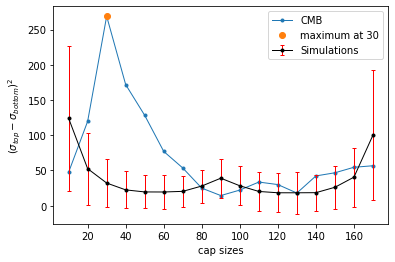

In [10]:
import matplotlib.pyplot as plt

sim_anomaly = np.loadtxt("./output/errors_of_anomaly_vs_size.txt")
means   = sim_anomaly[:,1]
errors  = sim_anomaly[:,2]

# sky
plt.plot(cap_angles, X2, marker = '.', lw=1)
# simulation
plt.errorbar(cap_angles, means, errors, marker = '.', color='k', ecolor='red', lw=1, capsize=2, capthick=1)
# maximum of sky
_max = X2.argmax()
plt.plot(cap_angles[_max], X2[_max], "o")
# labels
label = r"$(\sigma_{top} - \sigma_{bottom})^2$"
plt.ylabel(label)
plt.xlabel(r"cap sizes")
max_point_label = "maximum at {}".format(cap_angles[_max])
plt.legend(["CMB", max_point_label, "Simulations"])